# tensorflow model internals

In [237]:
import os
import sys
import tensorflow as tf
print(f'{tf.config.functions_run_eagerly()=}')
print(f'{tf.config.list_logical_devices()=}')

tf.config.functions_run_eagerly()=False
tf.config.list_logical_devices()=[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [103]:
tf.debugging.set_log_device_placement(True)

In [104]:
def pub(obj) -> list[str]:
    return [x for x in dir(obj) if not x.startswith('_')]

def pub_v(obj):
    # return {x: getattr(obj,x) for x in pub(obj)}
    res = {}
    for x in pub(obj):
        try:
            res[x] = getattr(obj, x)
        except Exception as e:
            print(f"exn getting {x}: {e!r}")
            res[x] = e
    return res

def pub_t(obj) -> dict[str, type]:
    return {k: type(v) for k, v in pub_v(obj).items()}

### tf debug

def render_node(n) -> str:
    return f"{n.name}/{n.op}({n.input}) -> {dict(n.attr)}"

def graph_size(cf):
    return len(cf.graph.as_graph_def().node)

## saved models

In [122]:
# full maxdiff model
os.chdir('/Users/j/tmp/maxdiff_serving_stuff/prod_20220526_1414_bc1fca90-b95f-4ac9-b297-dd35a3a5bcc0/ApprovalBidenDv_d_maxdiff/serving/full')

In [123]:
%%time
m = tf.saved_model.load('.')

CPU times: user 9.26 s, sys: 113 ms, total: 9.37 s
Wall time: 9.38 s


2022-05-30 21:10:40.950130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 21:10:40.956691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [128]:
pub_t(m)

{'graph_debug_info': tensorflow.core.protobuf.graph_debug_info_pb2.GraphDebugInfo,
 'infer_raw': tensorflow.python.saved_model.function_deserialization.RestoredFunction,
 'infer_raw_all_times': tensorflow.python.saved_model.function_deserialization.RestoredFunction,
 'infer_transformed_examples': tensorflow.python.saved_model.function_deserialization.RestoredFunction,
 'model': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'signatures': tensorflow.python.saved_model.signature_serialization._SignatureMap,
 'tensorflow_git_version': str,
 'tensorflow_version': str}

In [239]:
{k: sys.getsizeof(v) for k, v in pub_v(m).items()}

{'graph_debug_info': 112,
 'infer_raw': 48,
 'infer_raw_all_times': 48,
 'infer_transformed_examples': 48,
 'model': 48,
 'signatures': 48,
 'tensorflow_git_version': 75,
 'tensorflow_version': 54}

In [137]:
pub_t(m.model)

{'call_and_return_all_conditional_losses': tensorflow.python.saved_model.function_deserialization.RestoredFunction,
 'keras_api': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'layer-0': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'layer-1': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'layer-10': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'layer-11': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'layer-12': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'layer-13': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'layer-14': tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject,
 'layer-15': tensorflow.python.saved_model.load.Loade

In [259]:
pub(m.model.keras_api)

['call_and_return_all_conditional_losses',
 'call_and_return_conditional_losses',
 'layer_metrics',
 'layer_regularization_losses',
 'layers',
 'metrics',
 'non_trainable_variables',
 'regularization_losses',
 'trainable_variables',
 'variables']

In [308]:
# from __future__ import annotations
# from typing import Any
# import graphviz

# class ObjGraph:
#     obj: Any
#     _attrs: dict[str, ObjGraph]
    
#     def __init__(self, obj):
#         self.obj = obj
#         self._attrs = {}
    
#     def attrs(self):
#         if not self._attrs:
#             for k in pub(self.obj):
#                 try:
#                     self._attrs[k] = ObjGraph(getattr(self.obj, k))
#                 except Exception as e:
#                     print(f"wut exn? {e!r}")
#         return self._attrs

#     def get_graph(self, graph=None, path=None, depth=1):
#         graph = graph or graphviz.Digraph()
#         path = path or ["o"]
#         self_pathstr = ".".join(path)

#         if depth == 0:
#             graph.node(self_pathstr, label=f"{path[-1]} ...")
#             return graph

#         graph.node(self_pathstr, label=f"{path[-1]}")
#         # graph.node(self_pathstr, label=f"{path[-1]} ({type(self.obj)})")
#         for k, v in self.attrs().items():
#             path_ = [*path, k]
#             attr_pathstr = ".".join(path_)
#             graph.edge(self_pathstr, attr_pathstr)
#             v.get_graph(graph=graph, path=path_, depth=depth-1)
#         return graph

In [256]:
pub(m.model.tft_layer)

['call_and_return_all_conditional_losses',
 'keras_api',
 'regularization_losses',
 'trainable_variables',
 'variables']

In [160]:
pub_t(m.infer_raw)

{'concrete_functions': list,
 'experimental_get_compiler_ir': method,
 'experimental_get_tracing_count': method,
 'function_spec': tensorflow.python.eager.function_spec.FunctionSpec,
 'get_concrete_function': method,
 'get_initialization_function': method,
 'input_signature': tuple,
 'name': str,
 'pretty_printed_concrete_signatures': method,
 'python_function': function}

In [150]:
pub_v(m.infer_raw)

{'concrete_functions': [<ConcreteFunction infer_raw(raw_features) at 0x2A61E5B10>],
 'experimental_get_compiler_ir': <bound method Function.experimental_get_compiler_ir of <tensorflow.python.saved_model.function_deserialization.RestoredFunction object at 0x2b38da530>>,
 'experimental_get_tracing_count': <bound method Function.experimental_get_tracing_count of <tensorflow.python.saved_model.function_deserialization.RestoredFunction object at 0x2b38da530>>,
 'function_spec': <tensorflow.python.eager.function_spec.FunctionSpec at 0x2b38d9000>,
 'get_concrete_function': <bound method Function.get_concrete_function of <tensorflow.python.saved_model.function_deserialization.RestoredFunction object at 0x2b38da530>>,
 'get_initialization_function': <bound method Function.get_initialization_function of <tensorflow.python.saved_model.function_deserialization.RestoredFunction object at 0x2b38da530>>,
 'input_signature': ({'coalesced_noncommercial_age': TensorSpec(shape=(None,), dtype=tf.float32, 

In [153]:
print(inspect.getsource(m.infer_raw.python_function))

  def restored_function_body(*args, **kwargs):
    """Calls a restored function or raises an error if no matching function."""
    if not saved_function.concrete_functions:
      raise ValueError("Found zero restored functions for caller function.")
    # This is the format of function.graph.structured_input_signature. At this
    # point, the args and kwargs have already been canonicalized.
    inputs = (args, kwargs)

    # First try to find a concrete function that can be called without input
    # conversions. This allows one to pick a more specific trace in case there
    # was also a more expensive one that supported tensors.
    for allow_conversion in [False, True]:
      for function_name in saved_function.concrete_functions:
        function = concrete_functions[function_name]
        if _concrete_function_callable_with(function, inputs, allow_conversion):
          return _call_concrete_function(function, inputs)

    signature_descriptions = []

    def _pretty_format_posit

In [166]:
len(m.infer_raw.concrete_functions)

1

In [170]:
pub_t(m.infer_raw.concrete_functions[0])

{'add_gradient_functions_to_graph': method,
 'add_to_graph': method,
 'captured_inputs': list,
 'function_def': tensorflow.core.framework.function_pb2.FunctionDef,
 'graph': tensorflow.python.framework.func_graph.FuncGraph,
 'inputs': list,
 'name': bytes,
 'output_dtypes': dict,
 'output_shapes': dict,
 'outputs': list,
 'pretty_printed_signature': method,
 'replace_capture_with_deferred_capture': method,
 'set_external_captures': method,
 'set_variables': method,
 'structured_input_signature': tuple,
 'structured_outputs': dict,
 'trainable_variables': tuple,
 'variables': tuple}

In [177]:
m.infer_raw.concrete_functions[0].variables, m.infer_raw.concrete_functions[0].trainable_variables

((), ())

In [191]:
len(m.infer_raw.concrete_functions[0].captured_inputs)

15

In [198]:
[x.shape for x in m.infer_raw.concrete_functions[0].captured_inputs]

[TensorShape([]),
 TensorShape([]),
 TensorShape([]),
 TensorShape([]),
 TensorShape([]),
 TensorShape([]),
 TensorShape([]),
 TensorShape([48]),
 TensorShape([48]),
 TensorShape([8]),
 TensorShape([8]),
 TensorShape([80, 2455, 1]),
 TensorShape([80, 2455, 1]),
 TensorShape([80, 2503, 1, 3]),
 TensorShape([80, 2503, 1, 3])]

In [201]:
[tf.reduce_prod(x.shape).numpy() for x in m.infer_raw.concrete_functions[0].captured_inputs]

[1, 1, 1, 1, 1, 1, 1, 48, 48, 8, 8, 196400, 196400, 600720, 600720]

In [197]:
m.infer_raw.concrete_functions[0].captured_inputs[10]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([0.04750447, 0.14416979, 0.17961112, 0.249956  , 0.17720549,
       0.17285615, 0.24583994, 0.13794559], dtype=float32)>

In [174]:
m.infer_raw.concrete_functions[0].structured_input_signature

(({'coalesced_noncommercial_age': TensorSpec(shape=(None,), dtype=tf.float32, name='raw_features/coalesced_noncommercial_age'),
   'cps_age_bucket_18_to_34': TensorSpec(shape=(None,), dtype=tf.float32, name='raw_features/cps_age_bucket_18_to_34'),
   'cps_age_bucket_35_to_49': TensorSpec(shape=(None,), dtype=tf.float32, name='raw_features/cps_age_bucket_35_to_49'),
   'cps_age_bucket_50_to_64': TensorSpec(shape=(None,), dtype=tf.float32, name='raw_features/cps_age_bucket_50_to_64'),
   'cps_age_bucket_65_and_over': TensorSpec(shape=(None,), dtype=tf.float32, name='raw_features/cps_age_bucket_65_and_over'),
   'cps_education_advanced_degree': TensorSpec(shape=(None,), dtype=tf.float32, name='raw_features/cps_education_advanced_degree'),
   'cps_education_associates_degree': TensorSpec(shape=(None,), dtype=tf.float32, name='raw_features/cps_education_associates_degree'),
   'cps_education_bachelors_degree': TensorSpec(shape=(None,), dtype=tf.float32, name='raw_features/cps_education_bach

In [164]:
print(m.infer_raw.pretty_printed_concrete_signatures())

restored_function_body(raw_features)
  Args:
    raw_features: {'coalesced_noncommercial_age': <1>, 'cps_age_bucket_18_to_34': <2>, 'cps_age_bucket_35_to_49': <3>, 'cps_age_bucket_50_to_64': <4>, 'cps_age_bucket_65_and_over': <5>, 'cps_education_advanced_degree': <6>, 'cps_education_associates_degree': <7>, 'cps_education_bachelors_degree': <8>, 'cps_education_high_school_graduate': <9>, 'cps_education_less_than_high_school': <10>, 'cps_education_some_college': <11>, 'cps_income_between_100k_150k': <12>, 'cps_income_between_25k_50k': <13>, 'cps_income_between_50k_75k': <14>, 'cps_income_between_75k_100k': <15>, 'cps_income_over_150k': <16>, 'cps_income_under_25k': <17>, 'data_quality_flag': <18>, 'data_quality_score': <19>, 'data_quality_score_2': <20>, 'gss_bible_bible_is_book_of_fables': <21>, 'gss_bible_bible_is_inspired_by_god': <22>, 'gss_bible_bible_is_word_of_god': <23>, 'gss_sexual_orientation_new_bisexual': <24>, 'gss_sexual_orientation_new_gay_lesbian_homosexual': <25>, 'gss_

In [219]:
pub(m.infer_raw)

['concrete_functions',
 'experimental_get_compiler_ir',
 'experimental_get_tracing_count',
 'function_spec',
 'get_concrete_function',
 'get_initialization_function',
 'input_signature',
 'name',
 'pretty_printed_concrete_signatures',
 'python_function']

In [225]:
print(inspect.getsource(m.infer_raw.python_function))

  def restored_function_body(*args, **kwargs):
    """Calls a restored function or raises an error if no matching function."""
    if not saved_function.concrete_functions:
      raise ValueError("Found zero restored functions for caller function.")
    # This is the format of function.graph.structured_input_signature. At this
    # point, the args and kwargs have already been canonicalized.
    inputs = (args, kwargs)

    # First try to find a concrete function that can be called without input
    # conversions. This allows one to pick a more specific trace in case there
    # was also a more expensive one that supported tensors.
    for allow_conversion in [False, True]:
      for function_name in saved_function.concrete_functions:
        function = concrete_functions[function_name]
        if _concrete_function_callable_with(function, inputs, allow_conversion):
          return _call_concrete_function(function, inputs)

    signature_descriptions = []

    def _pretty_format_posit

In [235]:
m.infer_raw.experimental_get_compiler_ir()

ValueError: Compiler IR can only be returned for functions marked with 'jit_compile=True'

In [202]:
# tft model
os.chdir('/Users/j/tmp/maxdiff_serving_stuff/prod_20220526_1414_bc1fca90-b95f-4ac9-b297-dd35a3a5bcc0/ApprovalBidenDv_d_maxdiff/tft/transform_fn/')

In [203]:
tftm = tf.saved_model.load('.')

2022-05-30 21:26:23.823085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 21:26:23.829231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [205]:
pub_v(tftm)

{'assets': ListWrapper([<tensorflow.python.training.tracking.asset.Asset object at 0x16a5ff040>]),
 'created_variables': ListWrapper([]),
 'graph_debug_info': ,
 'initializers': ListWrapper([<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x1678ac370>, <tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x1678ae920>]),
 'resources': ListWrapper([<tensorflow.python.training.tracking.resource.RestoredResource object at 0x1697238b0>, <tensorflow.python.training.tracking.resource.RestoredResource object at 0x169722080>]),
 'signatures': _SignatureMap({'serving_default': <ConcreteFunction signature_wrapper(*, inputs, inputs_1, inputs_10, inputs_11, inputs_12, inputs_13, inputs_14, inputs_15, inputs_16, inputs_17, inputs_18, inputs_19, inputs_2, inputs_20, inputs_21, inputs_22, inputs_23, inputs_24, inputs_25, inputs_26, inputs_27, inputs_28, inputs_29, inputs_3, inputs_30, inputs_31, inputs

In [211]:
len(tftm.transform_fn.captured_inputs)

11

In [212]:
tftm.transform_fn.captured_inputs

[<tf.Tensor: shape=(), dtype=int64, numpy=2455>,
 <tf.Tensor: shape=(), dtype=resource, value=<ResourceHandle(name="hash_table_tf.Tensor(b'/tmp/tmpmy2mm5i1/tftransform_tmp/issue_1', shape=(), dtype=string)_-2_-1_load_49893_50184", device="/job:localhost/replica:0/task:0/device:CPU:0", container="localhost", type="tensorflow::lookup::LookupInterface", dtype and shapes : "[  ]")>>,
 <tf.Tensor: shape=(), dtype=int64, numpy=-1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2455>,
 <tf.Tensor: shape=(), dtype=resource, value=<ResourceHandle(name="hash_table_tf.Tensor(b'/tmp/tmpmy2mm5i1/tftransform_tmp/issue_1', shape=(), dtype=string)_-2_-1_load_49893_50156", device="/job:localhost/replica:0/task:0/device:CPU:0", container="localhost", type="tensorflow::lookup::LookupInterface", dtype and shapes : "[  ]")>>,
 <tf.Tensor: shape=(), dtype=int64, numpy=-1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2455>,
 <tf.Tensor: shape=(48,), dtype=float32, numpy=
 array([0.29929712, 0.267552  , 0.2773335 ,

In [214]:
pub(tftm.transform_fn)

['add_gradient_functions_to_graph',
 'add_to_graph',
 'captured_inputs',
 'function_def',
 'graph',
 'inputs',
 'name',
 'output_dtypes',
 'output_shapes',
 'outputs',
 'pretty_printed_signature',
 'replace_capture_with_deferred_capture',
 'set_external_captures',
 'set_variables',
 'structured_input_signature',
 'structured_outputs',
 'trainable_variables',
 'variables']

In [216]:
print(tftm.transform_fn.pretty_printed_signature())

AssertionError: 

In [236]:
%load_ext tensorboard

## tf.function

In [188]:
# @tf.function
# def plus_two(x):
#   print("Tracing!") # An eager-only side effect.
#   return x + tf.constant(2)

@tf.function
def plus_two_py(x):
  print("Tracing!") # An eager-only side effect.
  return x + tf.constant(2)

plus_two_tf = tf.function(plus_two_py)

In [56]:
plus_two.get_concrete_function(3)

Tracing!


<ConcreteFunction plus_two(x=3) at 0x16BCB0130>

In [57]:
plus_two.get_concrete_function(3)

<ConcreteFunction plus_two(x=3) at 0x16BCB0130>

In [58]:
print(plus_two.pretty_printed_concrete_signatures())

plus_two(x=1)
  Returns:
    int32 Tensor, shape=()

plus_two(x=2)
  Returns:
    int32 Tensor, shape=()

plus_two(x=3)
  Returns:
    int32 Tensor, shape=()


In [73]:
cf = plus_two.get_concrete_function(3)

In [74]:
pub(cf)

['add_gradient_functions_to_graph',
 'add_to_graph',
 'captured_inputs',
 'function_def',
 'graph',
 'inputs',
 'name',
 'output_dtypes',
 'output_shapes',
 'outputs',
 'pretty_printed_signature',
 'replace_capture_with_deferred_capture',
 'set_external_captures',
 'set_variables',
 'structured_input_signature',
 'structured_outputs',
 'trainable_variables',
 'variables']

In [90]:
pub_t(cf)

{'add_gradient_functions_to_graph': method,
 'add_to_graph': method,
 'captured_inputs': list,
 'function_def': tensorflow.core.framework.function_pb2.FunctionDef,
 'graph': tensorflow.python.framework.func_graph.FuncGraph,
 'inputs': list,
 'name': bytes,
 'output_dtypes': tensorflow.python.framework.dtypes.DType,
 'output_shapes': tensorflow.python.framework.tensor_shape.TensorShape,
 'outputs': list,
 'pretty_printed_signature': method,
 'replace_capture_with_deferred_capture': method,
 'set_external_captures': method,
 'set_variables': method,
 'structured_input_signature': tuple,
 'structured_outputs': tensorflow.python.framework.ops.Tensor,
 'trainable_variables': tuple,
 'variables': tuple}

In [76]:
def fn(x):
    return x + 2

In [78]:
gfn = tf.autograph.to_graph(fn)
gfn

<function __main__.outer_factory.<locals>.inner_factory.<locals>.tf__fn(x)>

In [82]:
pub_v(gfn)

{'ag_module': <module '__autograph_generated_file35movjbo' from '/var/folders/l0/b7g1cb8x6jjftr65vxz7h2600000gn/T/__autograph_generated_file35movjbo.py'>,
 'ag_source_map': {LineLocation(filename='/var/folders/l0/b7g1cb8x6jjftr65vxz7h2600000gn/T/__autograph_generated_file35movjbo.py', lineno=6): 231541357.py:1:0,
  LineLocation(filename='/var/folders/l0/b7g1cb8x6jjftr65vxz7h2600000gn/T/__autograph_generated_file35movjbo.py', lineno=10): 231541357.py:2:4,
  LineLocation(filename='/var/folders/l0/b7g1cb8x6jjftr65vxz7h2600000gn/T/__autograph_generated_file35movjbo.py', lineno=12): 231541357.py:2:11},
 'autograph_info__': None}

In [101]:
print(tf.autograph.to_code(fn))

def tf__fn(x):
    with ag__.FunctionScope('fn', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = ag__.ld(x) + 2
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [86]:
inner = gfn.ag_module.outer_factory()

In [92]:
import inspect

In [97]:
inspect.getsource(fn)

'def fn(x):\n    return x + 2\n'

In [99]:
print(inspect.getsource(gfn))

        def tf__fn(x):
            with ag__.FunctionScope('fn', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
                do_return = False
                retval_ = ag__.UndefinedReturnValue()
                try:
                    do_return = True
                    retval_ = ag__.ld(x) + 2
                except:
                    do_return = False
                    raise
                return fscope.ret(retval_, do_return)



In [91]:
inner(1)(1)

AttributeError: 'int' object has no attribute 'FunctionScope'

In [87]:
@tf.function
def pow(a, b):
  return a ** b

square = pow.get_concrete_function(a=tf.TensorSpec(None, tf.float32), b=2)
print(square)

ConcreteFunction pow(a, b=2)
  Args:
    a: float32 Tensor, shape=<unknown>
  Returns:
    float32 Tensor, shape=<unknown>


In [106]:
square(tf.constant(3.0))

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [110]:
square(tf.constant(3.0), b=2)

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

In [177]:
render_node(p)

"pow/Pow(['a', 'pow/y']) -> {'T': type: DT_FLOAT\n}"

In [9]:
from matplotlib import pyplot as plt
import numpy as np

In [25]:
x = np.arange(0., 10., 0.2)
y = 2 * (x-3)**2 + 3

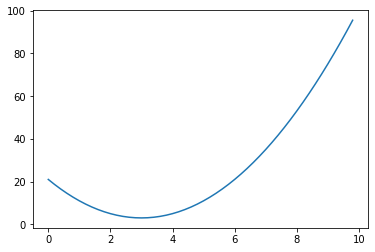

In [26]:
plt.plot(x, y)

In [68]:
def diff(xs):
    derivs = []
    y = tf.Variable(0)
    for x in xs:
        # x = tf.Variable(x)†
        with tf.GradientTape(persistent=True) as g:
            g.watch(x)
            y = 2 * (x-3)**2 + 3
        # print(f"{x=}, {g.gradient(y, x)=}")
        derivs.append((x, g.gradient(y, x)))
    return derivs

In [69]:
grads = diff(tf.Variable(x))

In [70]:
grad_x = [x[0].numpy() for x in grads]
grad_y = [x[1].numpy() for x in grads]

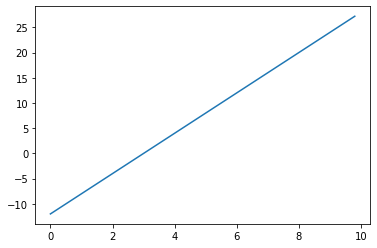

In [71]:
plt.plot(grad_x, grad_y)